In [1]:
import tigertail as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100)
gift_timestamp

array(['1999-11-18T13:04:00.000000000', '1999-11-18T23:37:00.000000000',
       '1999-11-18T08:38:00.000000000', '1999-11-18T10:04:00.000000000',
       '1999-11-18T00:44:00.000000000', '1999-11-18T01:48:00.000000000',
       '1999-11-18T03:00:00.000000000', '1999-11-18T03:39:00.000000000',
       '1999-11-18T16:00:00.000000000', '1999-11-18T09:23:00.000000000',
       '1999-11-18T00:36:00.000000000', '1999-11-18T05:07:00.000000000',
       '1999-11-18T05:37:00.000000000', '1999-11-18T08:03:00.000000000',
       '1999-11-18T23:44:00.000000000', '1999-11-18T11:18:00.000000000',
       '1999-11-18T20:15:00.000000000', '1999-11-18T23:24:00.000000000',
       '1999-11-18T11:21:00.000000000', '1999-11-18T12:27:00.000000000',
       '1999-11-18T20:09:00.000000000', '1999-11-18T13:36:00.000000000',
       '1999-11-18T09:04:00.000000000', '1999-11-18T04:41:00.000000000',
       '1999-11-18T03:33:00.000000000', '1999-11-18T17:41:00.000000000',
       '1999-11-18T01:37:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:21:00     0.964946
1999-11-18 00:36:00     0.261688
1999-11-18 00:42:00     0.620840
1999-11-18 00:44:00     0.888652
1999-11-18 00:47:00     0.649344
...                          ...
1999-11-18 23:24:00     0.560251
1999-11-18 23:33:00     0.651755
1999-11-18 23:37:00     0.695755
1999-11-18 23:44:00     0.028650
1999-11-18 23:55:00     0.387173

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

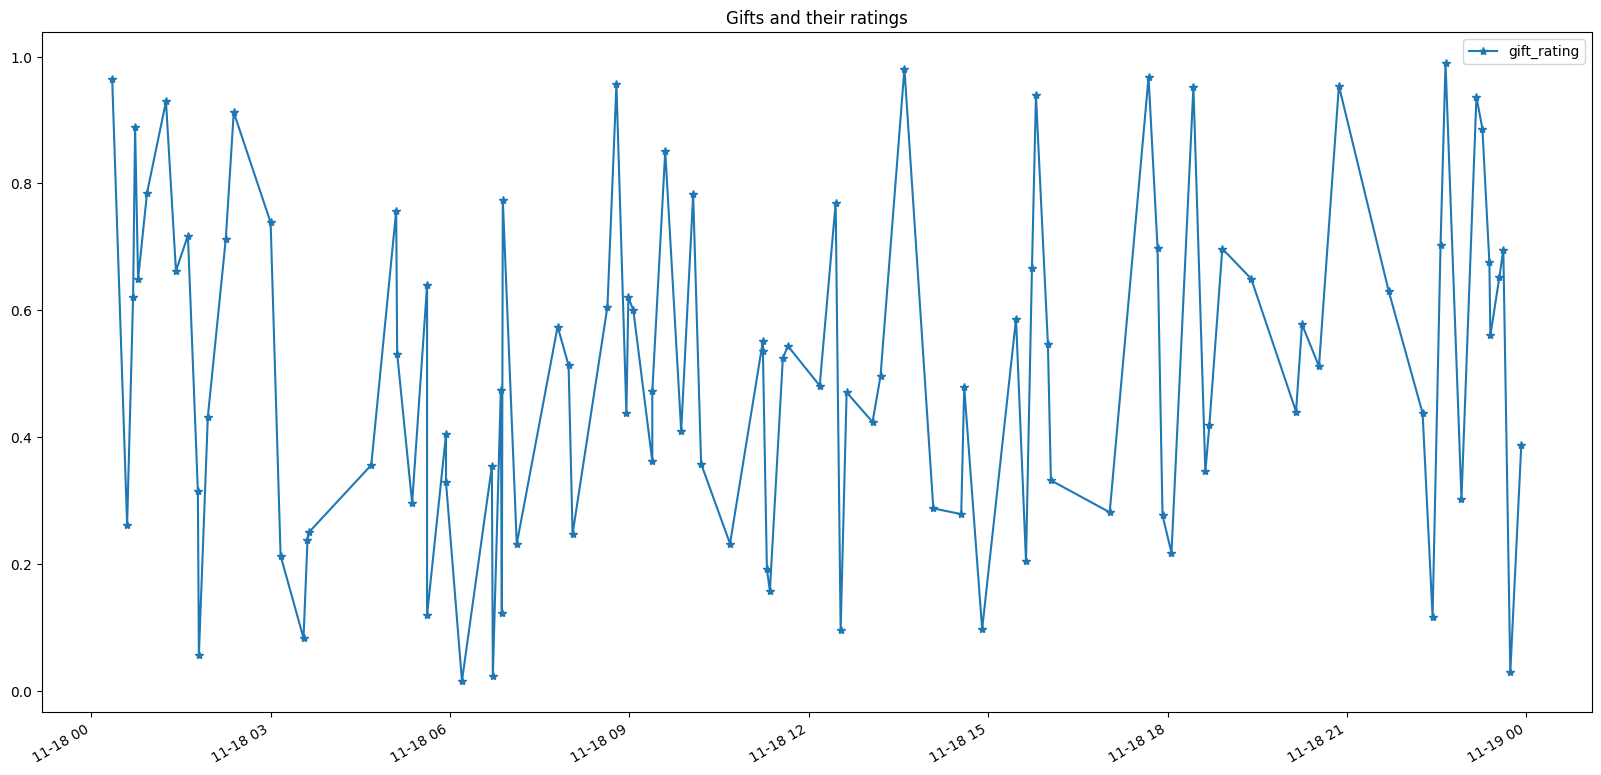

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

In [4]:
# print default agg funcs from TimeFrame class?

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [5]:
gift_es = tt.EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [6]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.695132
1999-11-18 01:00:00    0.518763
1999-11-18 02:00:00    0.812221
1999-11-18 03:00:00    0.304531
1999-11-18 04:00:00    0.355887
1999-11-18 05:00:00    0.439354
1999-11-18 06:00:00    0.293820
1999-11-18 07:00:00    0.439564
1999-11-18 08:00:00    0.573597
1999-11-18 09:00:00    0.538839
1999-11-18 10:00:00    0.457415
1999-11-18 11:00:00    0.417363
1999-11-18 12:00:00    0.453864
1999-11-18 13:00:00    0.633713
1999-11-18 14:00:00    0.285400
1999-11-18 15:00:00    0.599028
1999-11-18 16:00:00    0.439129
1999-11-18 17:00:00    0.556042
1999-11-18 18:00:00    0.526303
1999-11-18 19:00:00    0.649691
1999-11-18 20:00:00    0.620831
1999-11-18 21:00:00    0.630053
1999-11-18 22:00:00    0.509959
1999-11-18 23:00:00    0.602770
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

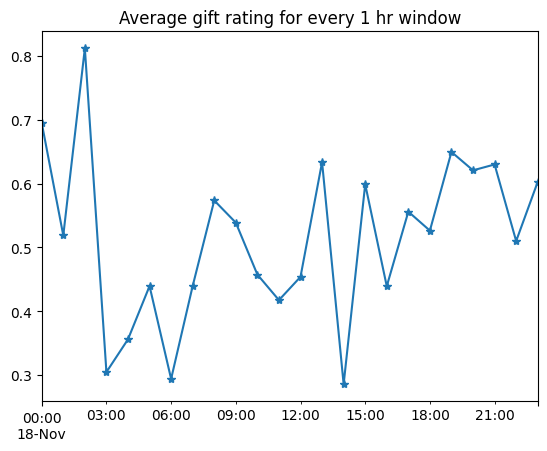

In [7]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [8]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:20:00    0.964946
1999-11-18 00:25:00    0.000000
1999-11-18 00:30:00    0.000000
1999-11-18 00:35:00    0.261688
1999-11-18 00:40:00    0.754746
                         ...   
1999-11-18 23:35:00    0.695755
1999-11-18 23:40:00    0.028650
1999-11-18 23:45:00    0.000000
1999-11-18 23:50:00    0.000000
1999-11-18 23:55:00    0.387173
Freq: 5min, Length: 284, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

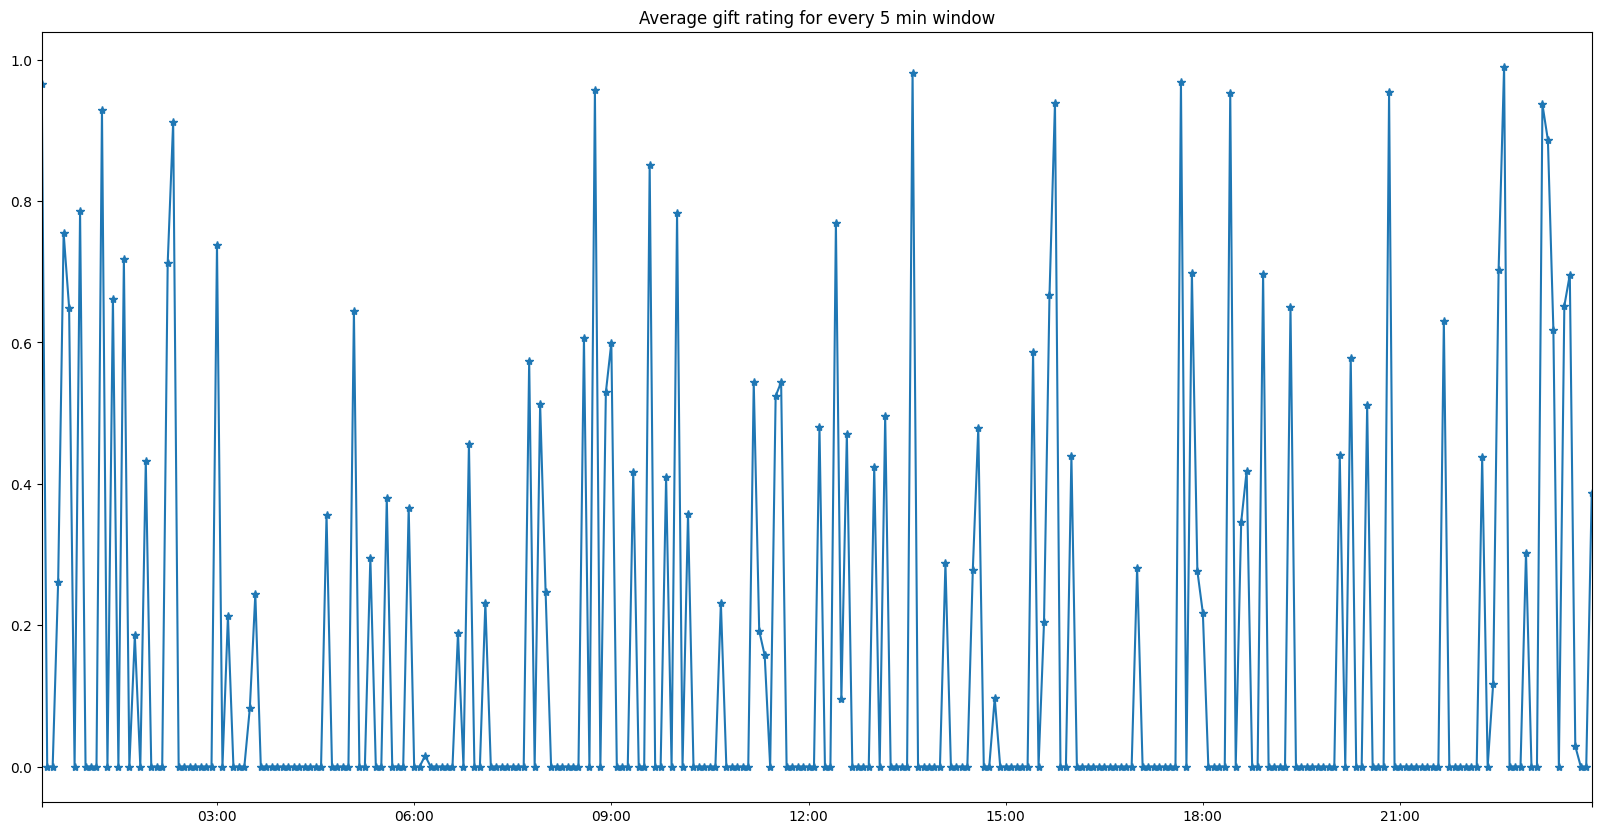

In [9]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

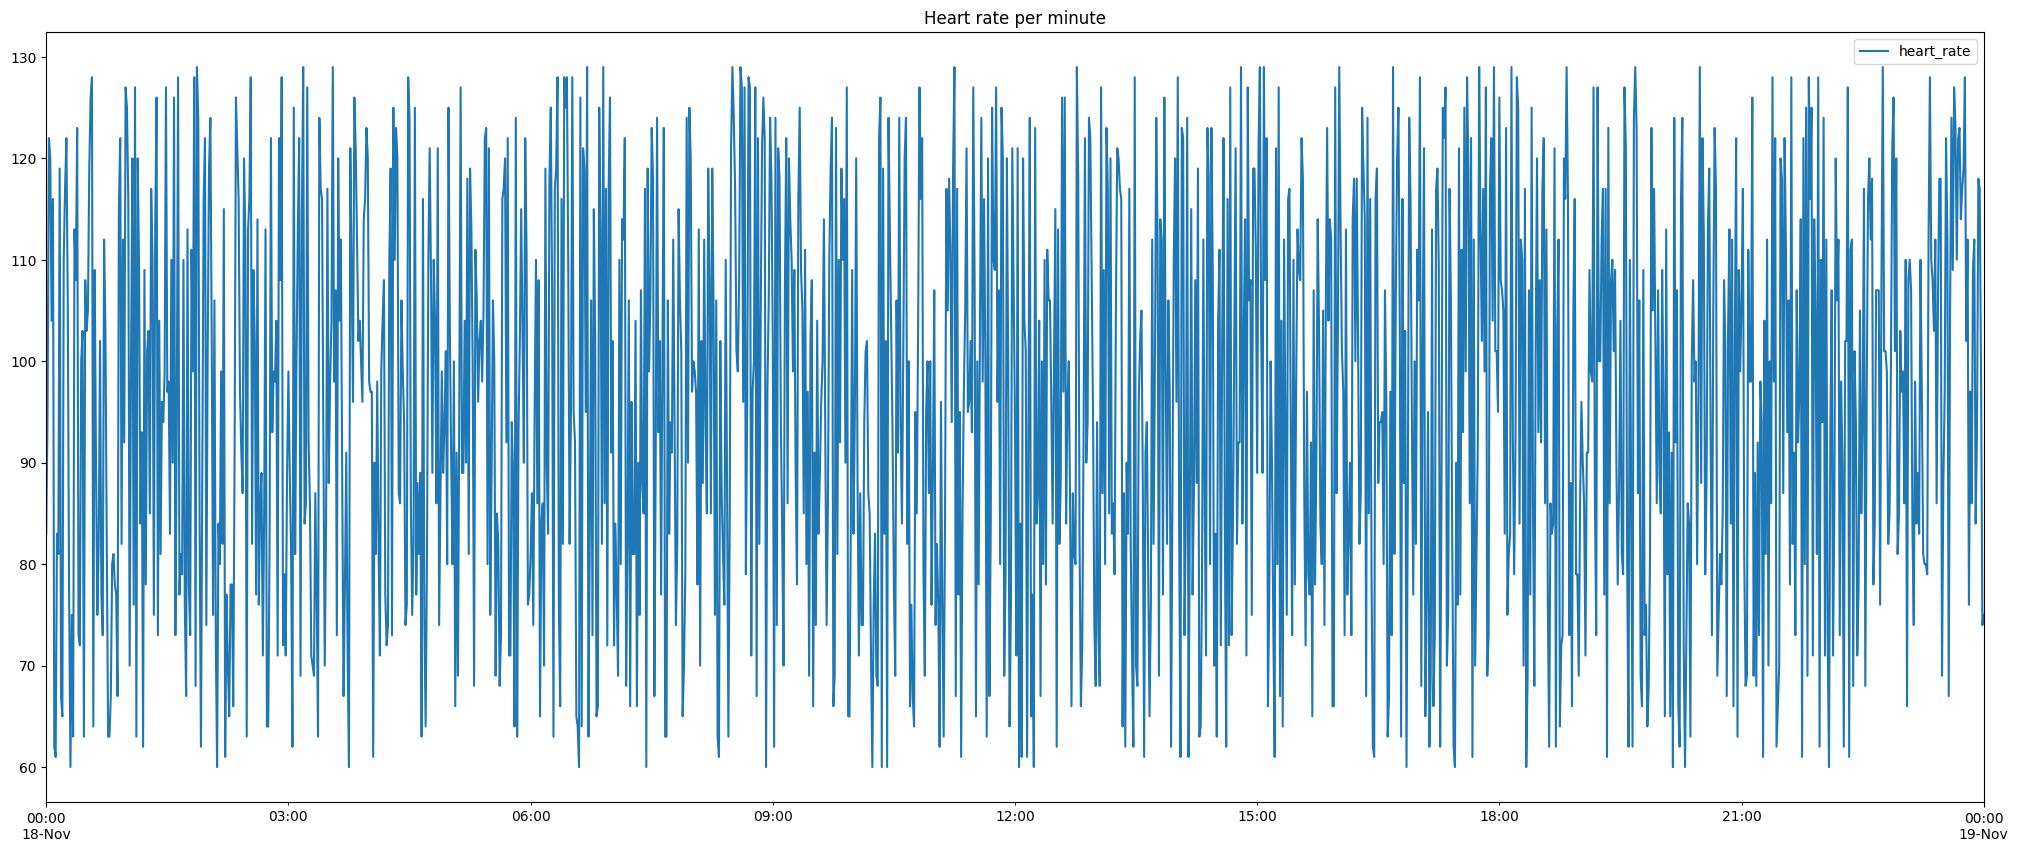

In [10]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [11]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[99,
 99,
 99,
 99,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 160,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 160,
 108,
 111,
 116,
 126,
 156,
 164,
 156,
 161,
 126,
 156,
 163,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 161,
 99,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 161,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 165,
 101,
 102,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 163,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 156,
 158,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 158,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 160,
 104,
 106,
 108,
 111,
 116,
 126,
 156,
 162,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 99,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 102,
 102,


<Axes: title={'center': 'New heart rate per minute values'}>

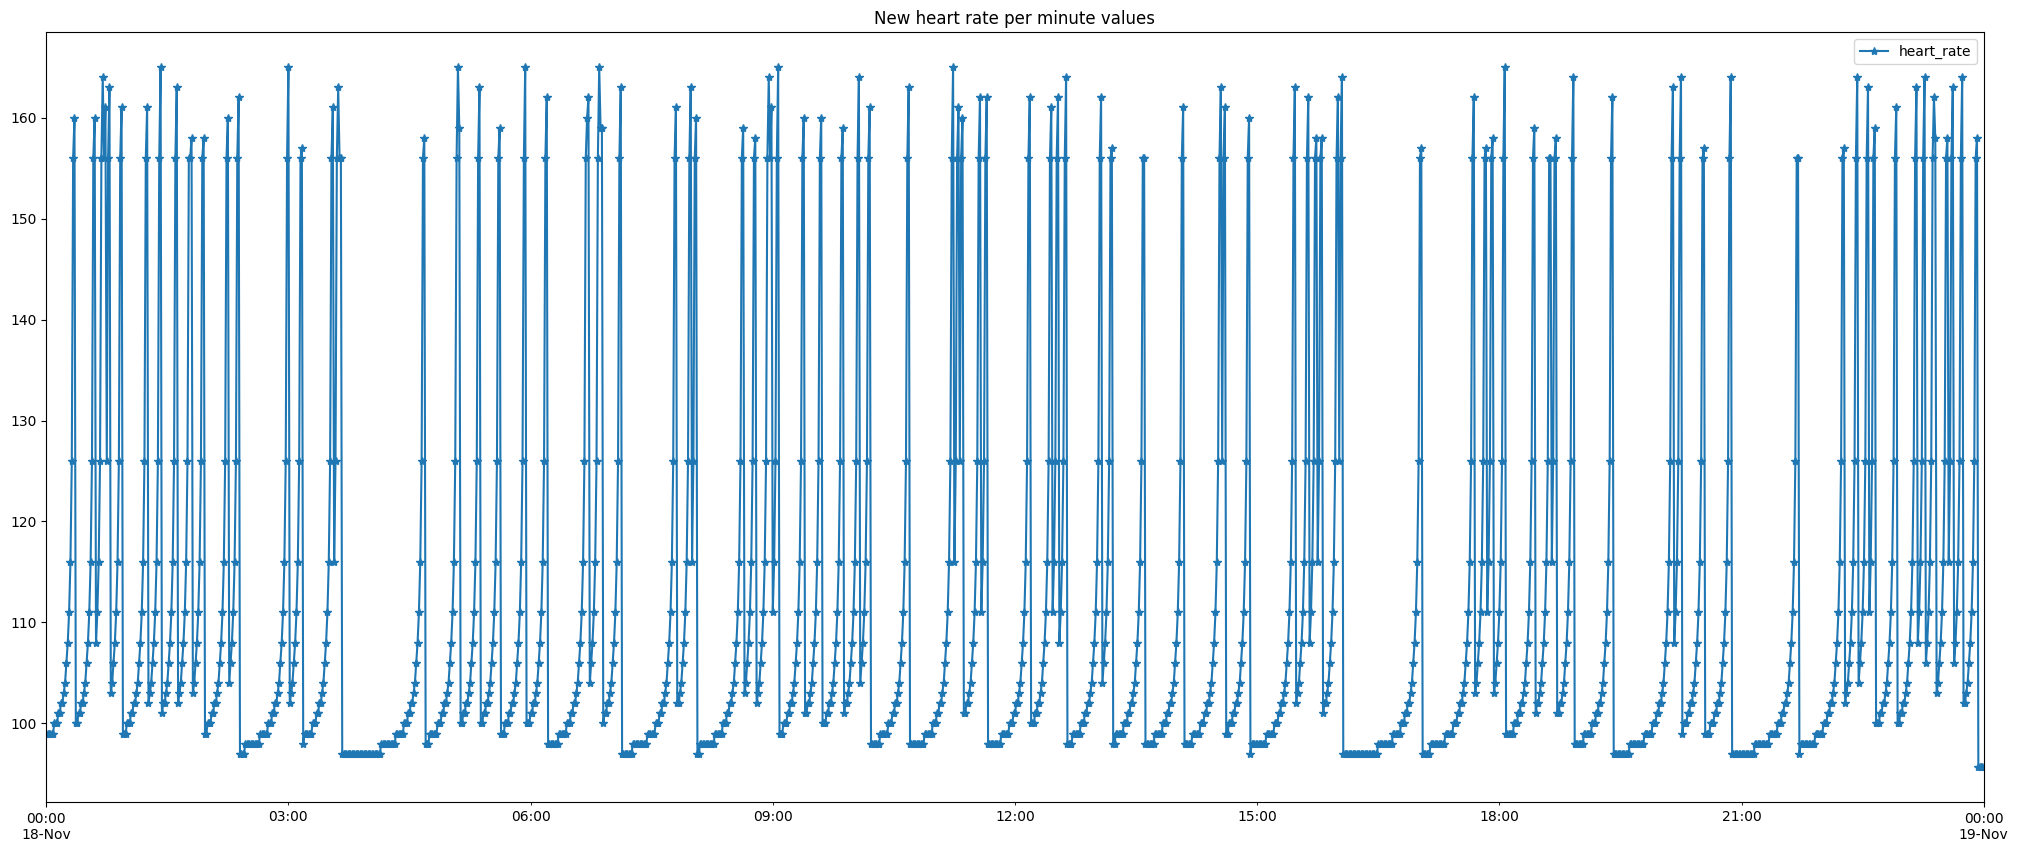

In [12]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [13]:
hr_ts = tt.TimeSeries(new_hr_df, agg_func=np.mean)

<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

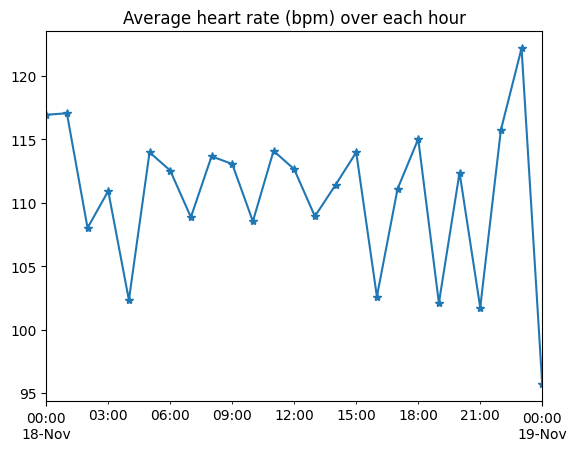

In [14]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

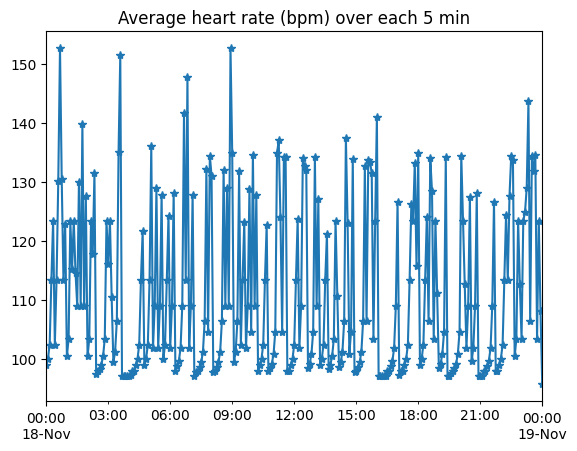

In [15]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [16]:
tf = tt.TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

In [17]:
# there's an NaN value for the last timestamp for gift_rating since there are no events 
# at that hour, the last row of the resulting dataframe could be deleted or kept

tf.window('1h')

,gift_rating,heart_rate
1999-11-18 00:00:00,0.695132,116.950000
1999-11-18 01:00:00,0.518763,117.066667
1999-11-18 02:00:00,0.812221,108.016667
1999-11-18 03:00:00,0.304531,110.933333
1999-11-18 04:00:00,0.355887,102.333333
1999-11-18 05:00:00,0.439354,113.983333
1999-11-18 06:00:00,0.293820,112.550000
1999-11-18 07:00:00,0.439564,108.866667
1999-11-18 08:00:00,0.573597,113.666667
1999-11-18 09:00:00,0.538839,113.066667


Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

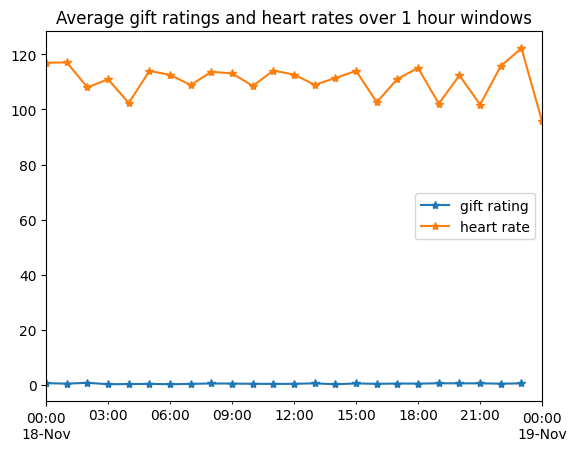

In [18]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

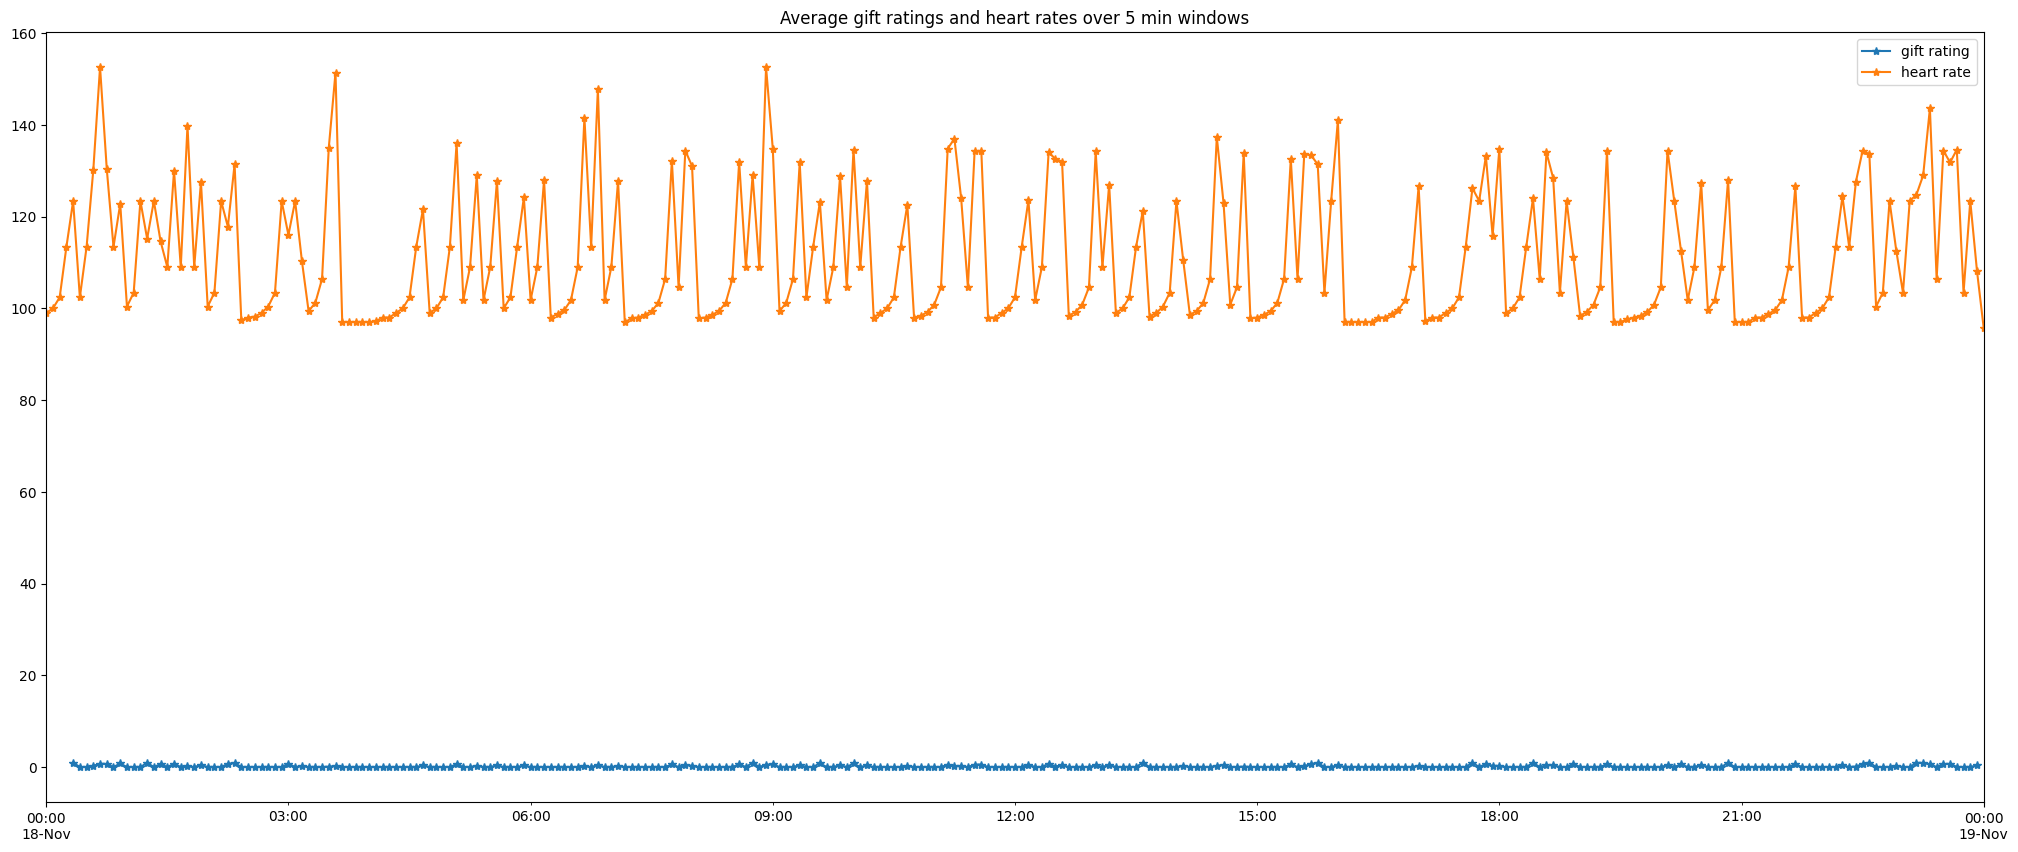

In [19]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])